In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Curso practico machine learning

/content/drive/MyDrive/Colab Notebooks/Curso practico machine learning


In [3]:
dataset = pd.read_csv('salarios.csv')

In [4]:
dataset.head()

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [5]:
dataset.shape

(30, 2)

## Dividimos el dataset con train_test_split

In [6]:
x = dataset.iloc[:, :-1].values # Aexperiencia
y = dataset.iloc[:,1].values # Salario

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [8]:
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

In [9]:
# Usando dictionary like notation
_x = dataset[['Aexperiencia']].values
_y = dataset[['Salario']].values

In [10]:
_X_train, _X_test, _Y_train, _Y_test = train_test_split(_x,_y, test_size=0.2, random_state=0)

## Creacion del modelo

In [11]:
# Creamos la instancia de la clase LinearRegression para el modelo
regressor = LinearRegression()

# entrenamos la instancia
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

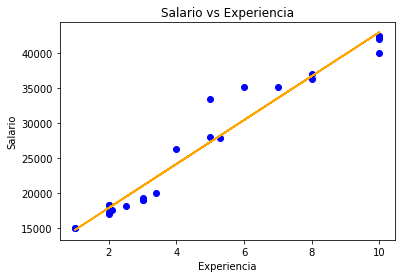

In [12]:
viz_train = plt
# PLot de Datos entrenamiento
viz_train.scatter(X_train, Y_train, color='blue')
# PLot de modelo de Regresion lineal 
viz_train.plot(X_train, regressor.predict(X_train), color = 'orange')
# Agregados de la grafica
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
# Mostrar grafica
viz_train.show()

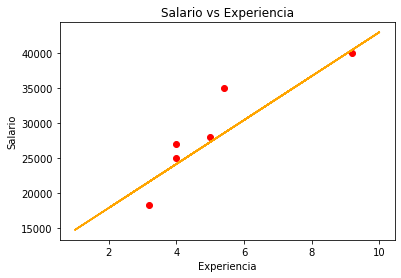

In [13]:
viz_train = plt
# PLot de Datos prueba
viz_train.scatter(X_test, Y_test, color='red')
# PLot de modelo de Regresion lineal 
viz_train.plot(X_train, regressor.predict(X_train), color = 'orange')
# Agregados de la grafica
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
# Mostrar grafica
viz_train.show()


## Visualizando el score

In [14]:
regressor.score(X_test, Y_test)

0.7862437374732997

## Descubrimientos Adicionales[texto del vínculo](https://)

In [ ]:
# Pasar una prediccion fuera del array al modelo
regressor.predict(np.array([[0.4 ]]))

El score puede aumentar si tuvieramos mas datos a disposicion

## Reto agregar una columna de paises 

- ML usa enteros o flotantes por lo que no puedes tener variables categoricas

In [15]:
import numpy as np

dataset = pd.read_csv('salarios.csv')
paises = ['VZ','MX','CO','BR','AR','US']
new_column = [paises[np.random.randint(0,len(paises))] for i in range(30)]
dataset['Pais'] = new_column

# Factorize crea indices numericos para cada pais
dataset['NormPaises'] = pd.factorize(dataset['Pais'])[0]

In [16]:
# Extract Data
x = dataset[['Aexperiencia','NormPaises']]
y = dataset['Salario']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.6, random_state=0)

# Entrena el modelo
regressor.fit(X_train,y_train)

# Obtiene el score
regressor.score(X_test,y_test)

0.9346504813880009

Text(0.5, 0, 'Salario')

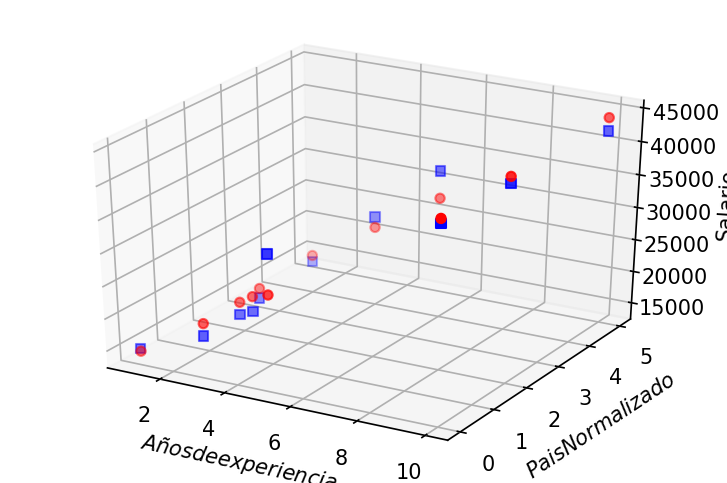

In [17]:
# Grafica
fig = plt.figure(dpi = 150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Aexperiencia'],X_train['NormPaises'],y_train,c='b',marker='s')
ax.scatter(X_train['Aexperiencia'],X_train['NormPaises'],regressor.predict(X_train),c='r',marker='o')
ax.set_xlabel('$Años de experiencia$')
ax.set_ylabel('$Pais Normalizado$')
ax.set_zlabel('Salario')

## Descubrimientos adicionales


In [84]:
# Pasar una prediccion fuera del array al modelo (2D)
regressor.predict(np.array([[0.4, 1 ]]))

12763.376345768134

In [86]:
# Guardar el modelo
import pickle

# save the model to disk
filename = 'salary_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

In [88]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(np.array([[0.4, 1 ]]))
print(result)

[12763.37634577]
